## 1.1什么是Pytorch

PyTorch是帮助和促进我们构建深度学习项目的一个库

PyTorch提供了一个核心数据结构——Tensor，一个与NumPy数组非常相似的多维数组。在此基础上，为了轻松实现并运行一个项目，或者设计和训练一个新的神经网络结构，Tensor内部实现了一系列功能。Tensor可用于加速数学运算（需要软硬件搭配得当），并且PyTorch内置了可用于分布式训练、高效数据加载的函数包，以及大量常用的深度学习函数。

## 1.2本书讲了什么

## 1.3为什么推荐pytorch

PyTorch由于其易用性和高性能

PyTorch感觉就像是能够在GPU上运行并且带有自动求导功能的NumPy，这使得PyTorch非常适合于深度学习中的反向传播。

Tensor API 易用。

### 1.3.1 深度学习的革命

直到2000年代末，广泛使用“机器学习”系统还是非常依赖于特征工程（feature engineering）。
模型最终的效果取决于研发者所提取特征的表征能力。

不同的是，深度学习从原始数据中自动学习特征并成功地完成任务。
基于优化算法自动提取特征，模型最终的效果取决于研发者根据目标所用的算法性能。

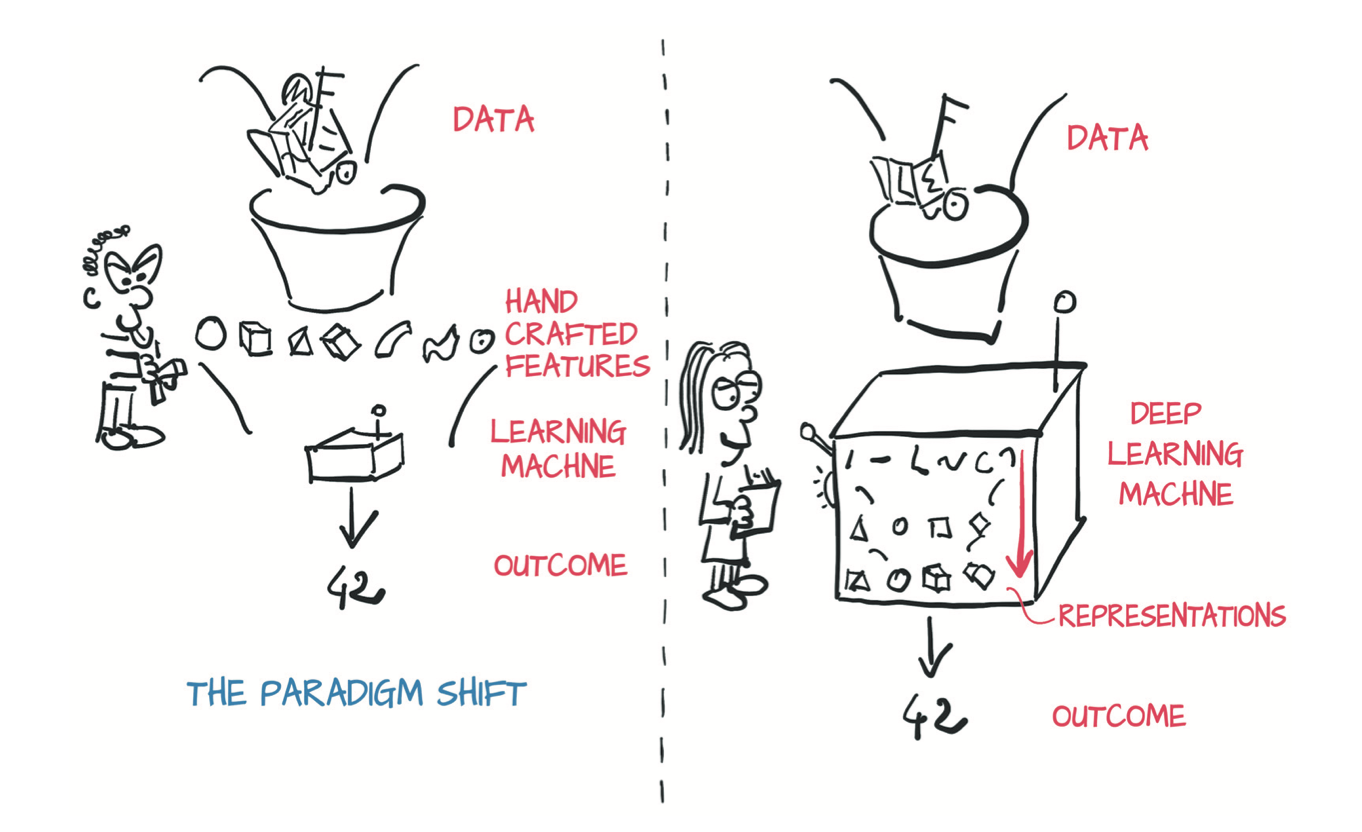

### 1.3.2 即时执行和延迟执行

PyTorch的易用性很大程度上是因为它如何实现即时执行。PyTorch就像普通的Python程序一样，默认执行方式为即时执行（在PyTorch文档中称为Eager Mode）

静态图的性能可能更好。而动态图通常更容易完成循环或条件判断这些操作。

类比一个例子： y = wx + b 
 - 静态图 ：先定义 y = w[] + [] , 然后向占位符中带入 x 和 b 
 - 动态图 : 先计算 x1 = wx , 再计算 y = x1 + b 。 




pytorch 默认动态图。以单个神经元的典型数学表达 o=tanh(wx+b)为例。
静态图和动态图的区别如下：

计算单个神经单元简单计算的静态图
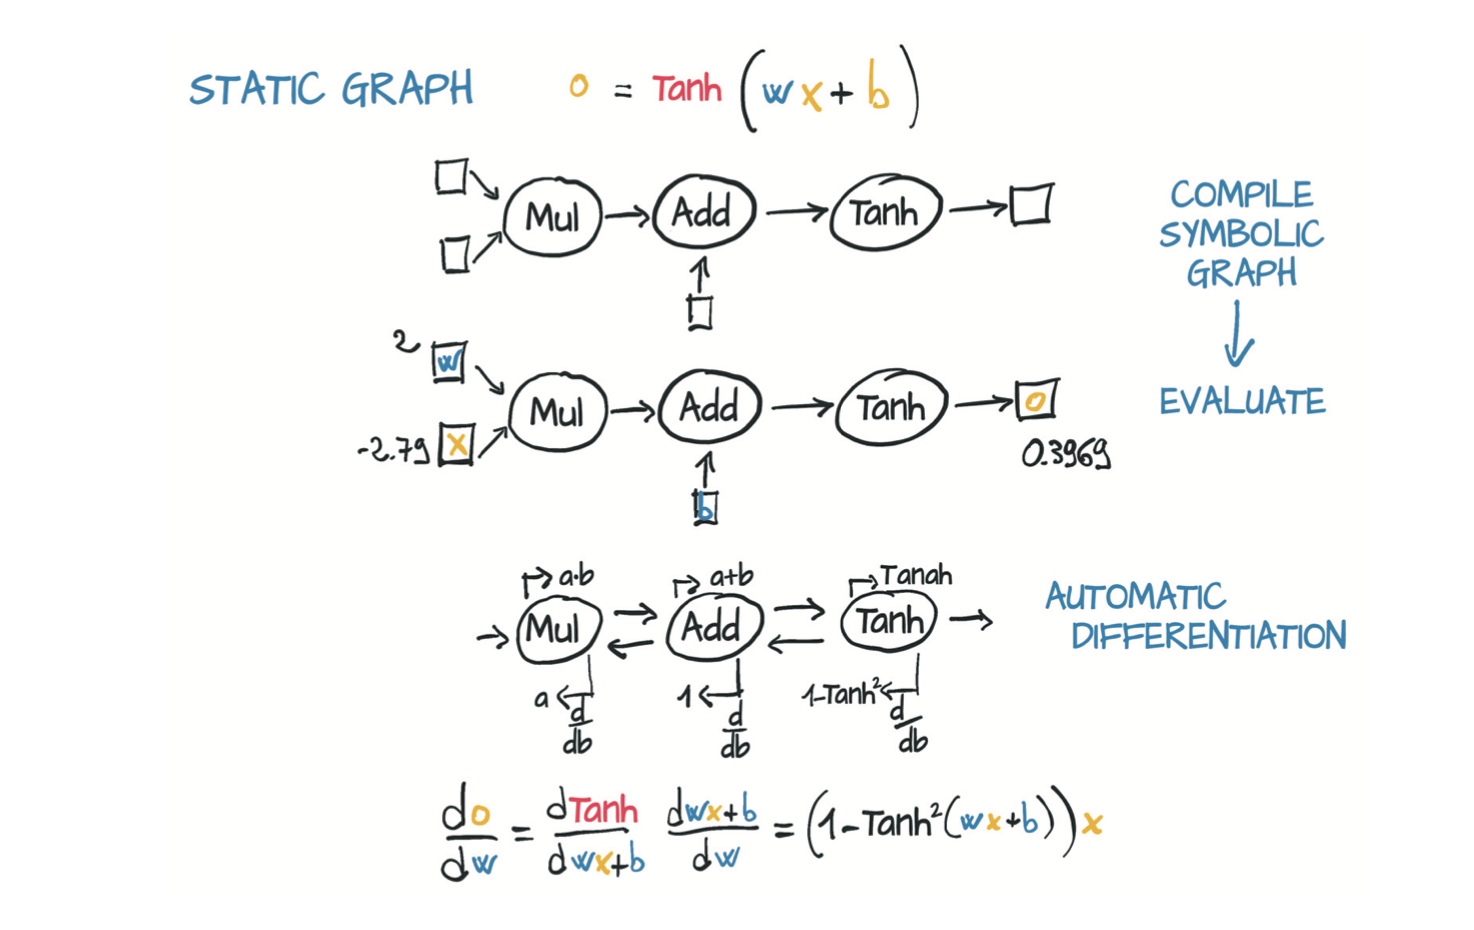

计算单个神经单元简单计算的动态图

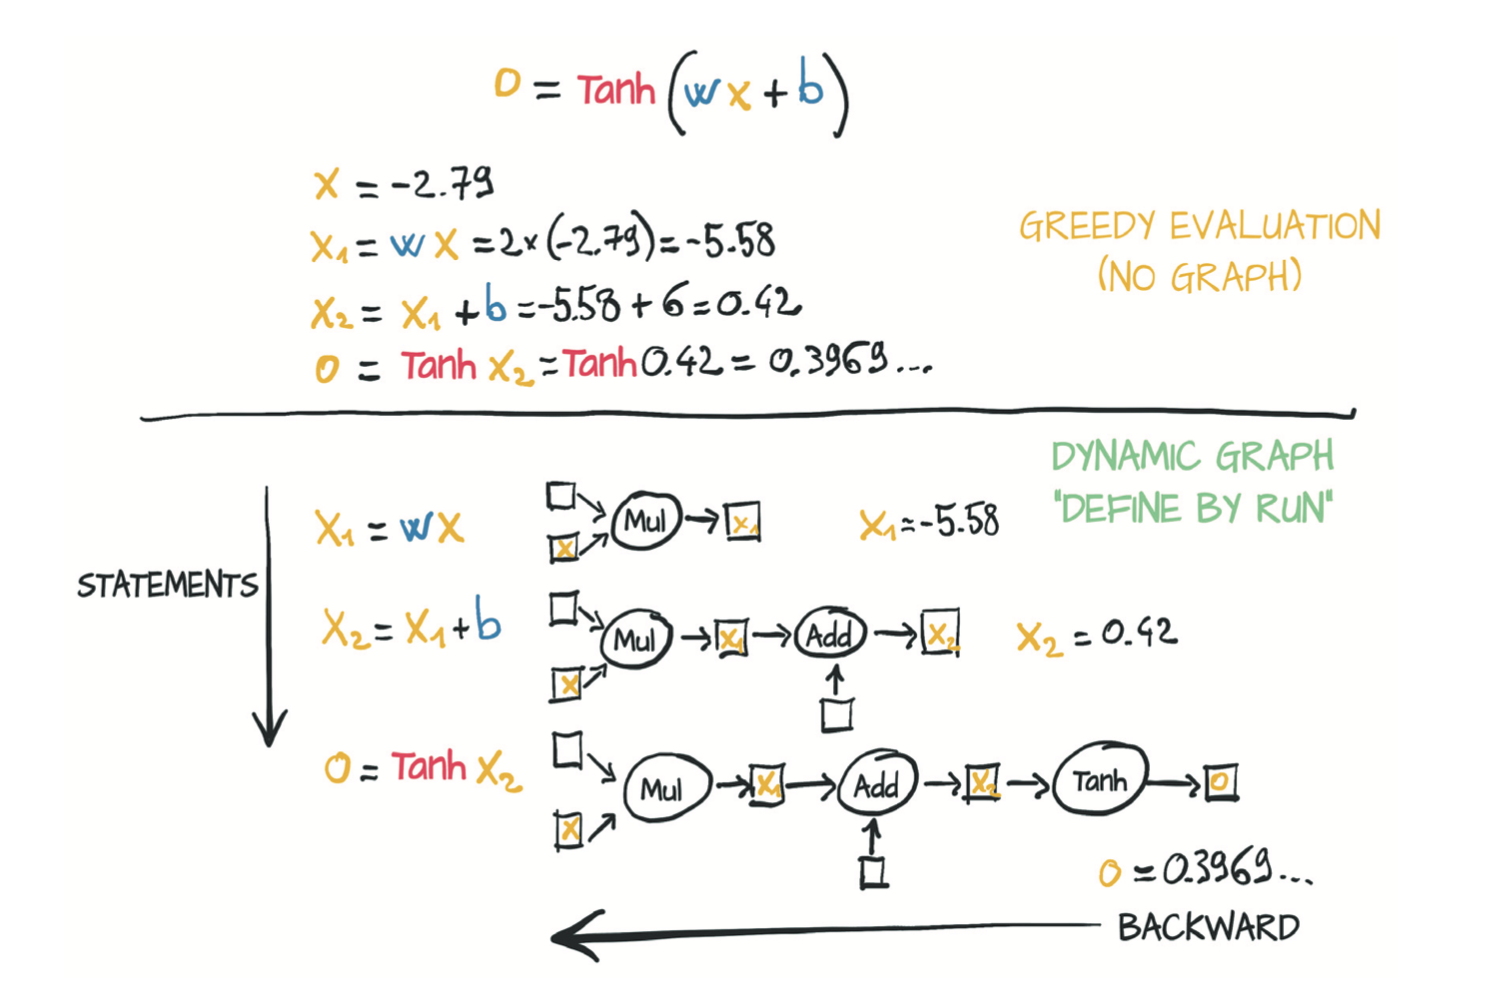

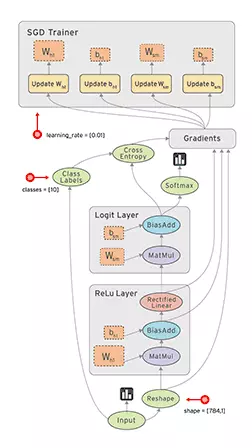

### 1.3.3 深度学习的竞争领域

TensorFlow
- 使用Keras作为核心API
- 提供即时执行模式（eager mode）
- 宣布eager mode为TF2.0的默认执行模式

PyTorch
- 使用Caffe2作为后端
- 替换了基于Lua的Torch项目中重复使用的大多数低级代码
- 增加了对ONNX的支持，定义了一种与深度学习库无关的模型描述和转换格式
- 增加了称为TorchScript的延迟执行图模式运行引擎
- 发布了1.0版本

TensorFlow拥有强大的生产渠道、广泛的行业社区和广泛的思维共享。另一方面，由于PyTorch的易用性，它已在研究和教学社区中取得了巨大进展，并且随着研究人员和毕业生培训学生不断进入行业而不断发展壮大。有趣的是，随着TorchScript和eager mode的出现，这两个框架的功能集开始融合。

## 1.4 PyTorch包含的组件

由于性能原因，大多数PyTorch都是用C++和CUDA编写的，CUDA是NVIDIA提供的类似C++的语言，可以将其编译然后在NVIDIA GPU上大规模并行运行。

根据给定的性能实际要求和规模要求，纯Python代码的方案足以将模型投入生产。

PyTorch的核心是提供多维数组的库，在PyTorch术语中这些多维数组称为张量（tensor），而torch模块则提供了可对其进行扩展操作的库。

PyTorch提供的第二个核心功能是允许张量跟踪对其所执行的操作，并通过反向传播来计算输出相对于其任何输入的导数。此功能由张量自身提供，并通过torch.autograd进一步扩展完善。

pytorch 深度学习 一个标准流程：加载数据，训练模型，然后将该模型部署到生产环境中。

PyTorch中用于构建神经网络的核心模块位于torch.nn中，该模块提供了常见的神经网络层和其他架构组件。全连接层、卷积层、激活函数和损失函数都能在该模块找到

为了训练该模型，你需要以下几点（除了循环本身以外，循环可直接采用标准的Python for循环）：训练数据的资源、使模型能够适应训练数据的优化器以及将模型和数据导入硬件中的方法，该硬件将执行训练模型所需的计算。

torch.util.data模块能够找到适用于数据加载和处理的工具。需要用到的两个主要的类是Dataset和DataLoader。Dataset承担了你的自定义的数据（可以是任何一种格式）与标准PyTorch张量之间的转换任务。DataLoader可以在后台生成子进程来从Dataset中加载数据，使数据准备就绪并在循环可以使用后立即等待训练循环。

在这些情况下，可以通过torch.nn.DataParallel和torch.distributed来使用其他的可用硬件，比如GPU。

当模型根据训练数据得到输出结果后，torch.optim提供了更新模型的标准方法，从而使输出更接近于训练数据中的标签。

为了避开Python解释器所带来的成本，以及使模型能够独立于Python而运行，PyTorch还提供了一个名为TorchScript的延迟执行模块。借助TorchScript，PyTorch可以序列化一组独立于Python而被调用的指令集。你可以将这个模型看作是具有针对张量操作的有限指令集的虚拟机。

### 1.4.1 深度学习所需要的硬件

任何最近的笔记本电脑或私人计算机都具有在新数据上运行预训练网络的能力。

对于一些更复杂的示例，进行一次完整的训练可能会需要一个具有CUDA功能的图形处理单元（GPU），例如一个具有8GB RAM的GPU（我们建议使用NVIDIA GTX 1070及以上级别的GPU）。


在同一个机器上使用多个GPU，或者更进一步使用配备了多个GPU的机器集群，能够有效地降低训练时间。

我们建议Windows用户使用Anaconda或Miniconda进行安装pytorch


### 1.4.2 使用Jupyter Notebook

https://jupyter.org/


本书github 
https://github.com/deep-learning-with-pytorch/dlwpt-code

# 总结
深度学习模型会自动地学习将样本中的输入和期望输出建立联系。

PyTorch等深度学习库可以使你有效地构建和训练神经网络模型。

PyTorch在专注于灵活性和速度的同时最大程度地降低了认知成本。它默认使用即时执行模式。

TorchScript是一种可以在C++中调用的预编译的延迟执行模型。

自2017年初PyTorch问世以来，深度学习工具的生态系统已显着巩固完善。
PyTorch提供了多个实用的功能库来帮助深度学习项目开发。